## Outline Of The Project 

In this project, I will try to apply CRISP-DM rules and will try to come up with 3 questions for the business and then answer these question with data.

I will work on both `Seattle AirBnb` and `Boston Airbnb` datasets to see their similarities and their differences.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

## 1. Business Understanding 

I will try to dig deep into the datasets for both `Seattle` and `Boston`. And after I understand the business details, I will come up with three different questions to look on.

### 1.1. Seattle Data 

In [2]:
seattle_listings = pd.read_csv('data/seattle/listings.csv')
seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20200521035945,2020-05-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within a few hours,67%,88%,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,29,59,89,132,2020-05-21,32,7,2008-09-15,2020-02-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-OPLI-19-002837,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.22
1,6606,https://www.airbnb.com/rooms/6606,20200521035945,2020-05-21,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...","Check in is at three, if you'd like a snack or...",NaN,NaN,I often escape to kingston and my place on the...,Please treat the cottage as if it were your ow...,NaN,NaN,https://a0.muscache.com/im/pictures/45742/2111...,NaN,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, Washington, United States",I am a therapist/innkeeper.I know my city well...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,5,5,"['email', 'phone', 'facebook', 're

In [3]:
seattle_listings.shape

(7017, 106)

In [4]:
seattle_calendar = pd.read_csv('data/seattle/calendar.csv')
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2020-05-21,f,$243.00,$243.00,1,1125
1,708774,2020-05-21,f,$105.00,$105.00,30,1125
2,708774,2020-05-22,f,$120.00,$120.00,30,1125
3,708774,2020-05-23,f,$120.00,$120.00,30,1125
4,708774,2020-05-24,f,$105.00,$105.00,30,1125


In [5]:
seattle_max_calendar_d = seattle_calendar.date.max()
seattle_min_calendar_d = seattle_calendar.date.min()

print("The dates between {} and {} have been shown for availability for listings!".format(seattle_min_calendar_d, 
                                                                                         seattle_max_calendar_d))

The dates between 2020-05-21 and 2021-05-24 have been shown for availability for listings!


In [6]:
seattle_reviews = pd.read_csv('data/seattle/reviews.csv')
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


### 1.2. Boston Data 

In [7]:
boston_listings = pd.read_csv('data/boston/listings.csv')
boston_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200610033559,2020-06-10,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,75%,44%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,4 months ago,t,0,0,7,97,2020-06-10,16,1,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.27
1,5506,https://www.airbnb.com/rooms/5506,20200610033559,2020-06-10,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/i

In [8]:
boston_listings.shape

(3440, 106)

In [9]:
boston_calendar = pd.read_csv('data/boston/calendar.csv')
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2020-06-10,f,$125.00,$125.00,28,1125
1,3781,2020-06-11,f,$125.00,$125.00,28,1125
2,3781,2020-06-12,f,$125.00,$125.00,28,1125
3,3781,2020-06-13,f,$125.00,$125.00,28,1125
4,3781,2020-06-14,f,$125.00,$125.00,28,1125


In [10]:
boston_max_calendar_d = seattle_calendar.date.max()
boston_min_calendar_d = seattle_calendar.date.min()

print("The dates between {} and {} have been shown for availability for listings!".format(boston_min_calendar_d, 
                                                                                         boston_max_calendar_d))

The dates between 2020-05-21 and 2021-05-24 have been shown for availability for listings!


In [11]:
boston_reviews = pd.read_csv('data/boston/reviews.csv')
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


**IMPORTANT NOTES TO TAKE:**

1. As I can see listings dataset gives the listings for that city, as anyone can guess :) However it is not very much when we look at the count of the listings. I think it is because, these are the ones that are given for 2019-2020 data. And their availability are given for 2020-2021. (Maybe only subset of the listings are shared from AirBnb, who knows)
2. The second important dataset is the calendar dataset is that which dates are available for guests. We can try to analyze for which dates you can find accommodation mostly, and which time frames are most suitable for accommodation when considering prices.
3. The last dataset which is the reviews dataset is very intriguing because with some basic NLP tools, we can see the sentiments for listings and try to select the best accomodation for that neighbourhood
4. As you can see, Seattle has almost two times of Boston listings, maybe Seattle has much more opportunity for accommodations to choose from!!

**QUESTIONS TO SOLVE**

After looking at the dataset very roughly, 3 questions popped into my head instantly.

1. **What are the most important amenities for a house, and which neighbourhood supplies which amenities for accommodation? And then compare them between `Boston` and `Seattle`.**

2. **How does the price change with each month and what is the number of listings for each month?**

3. **Can we predict price with some of the basic features? (Not more that 10 distinct features, maybe??)** 

## 2. Data Understanding 

After coming up with the questions in mind let's try to dig deep into the data.

Before starting to analyze a random listing, I want to see the neighbourhood distribution in both Boston and Seattle.

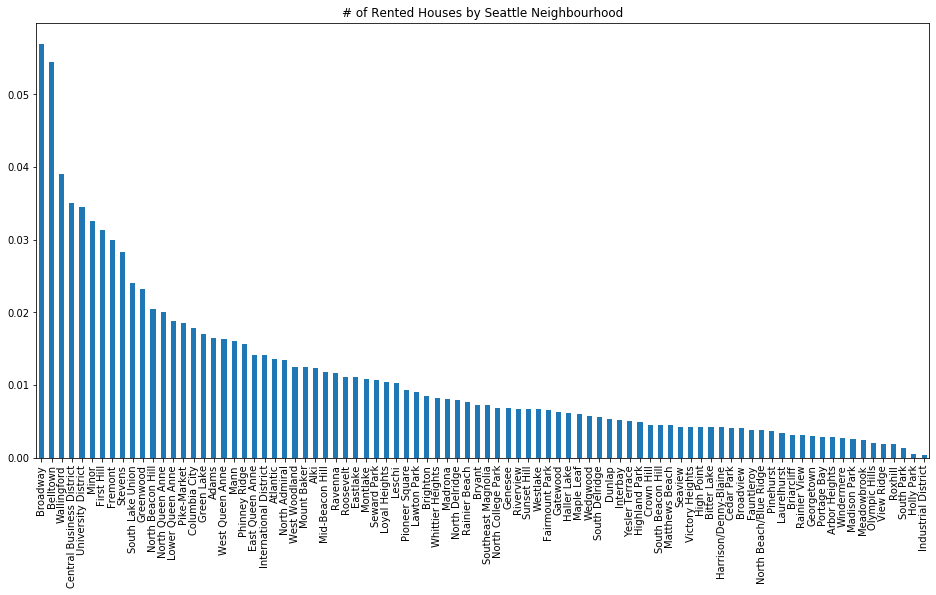

In [12]:
plt.rcParams['figure.figsize'] = [16, 8]

neighbour_groups_seattle = seattle_listings['neighbourhood_cleansed'].value_counts()

(neighbour_groups_seattle/seattle_listings.shape[0]).plot(kind='bar');
plt.title('# of Rented Houses by Seattle Neighbourhood');

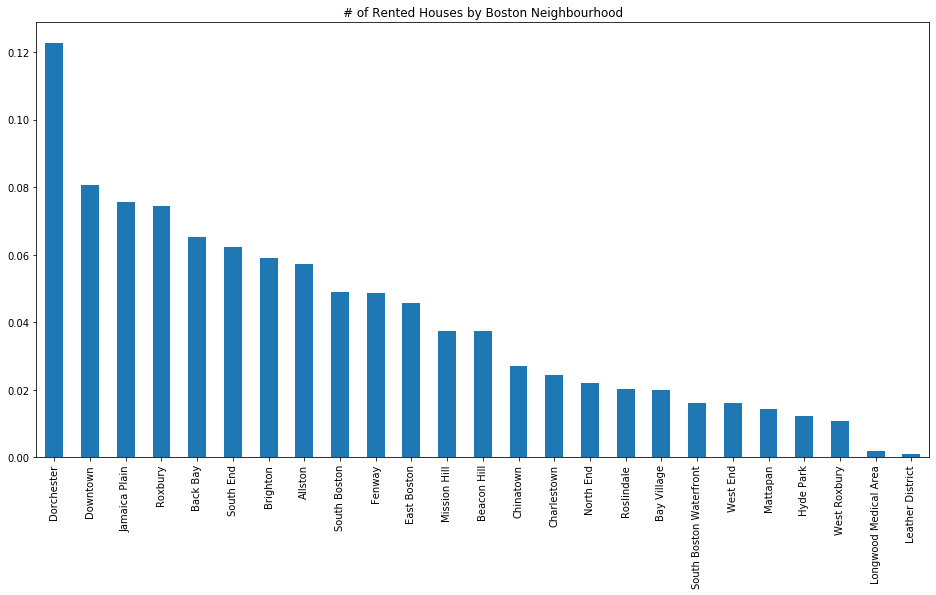

In [13]:
plt.rcParams['figure.figsize'] = [16, 8]

neighbour_groups_boston = boston_listings['neighbourhood_cleansed'].value_counts()

(neighbour_groups_boston/boston_listings.shape[0]).plot(kind='bar');
plt.title('# of Rented Houses by Boston Neighbourhood');

**IMPORTANT NOTES TO TAKE:**

1. As we can see, there are many neighbourhoods around Seattle for a listing; however in Boston this is much more less. As I have said before, there are not many available listings in Boston.
2. The other important part is in Boston first 10 neighbourhoods take up the percentage of 80% in number of listings. However, in Seattle it is not very distinctive between neighbourhoods.

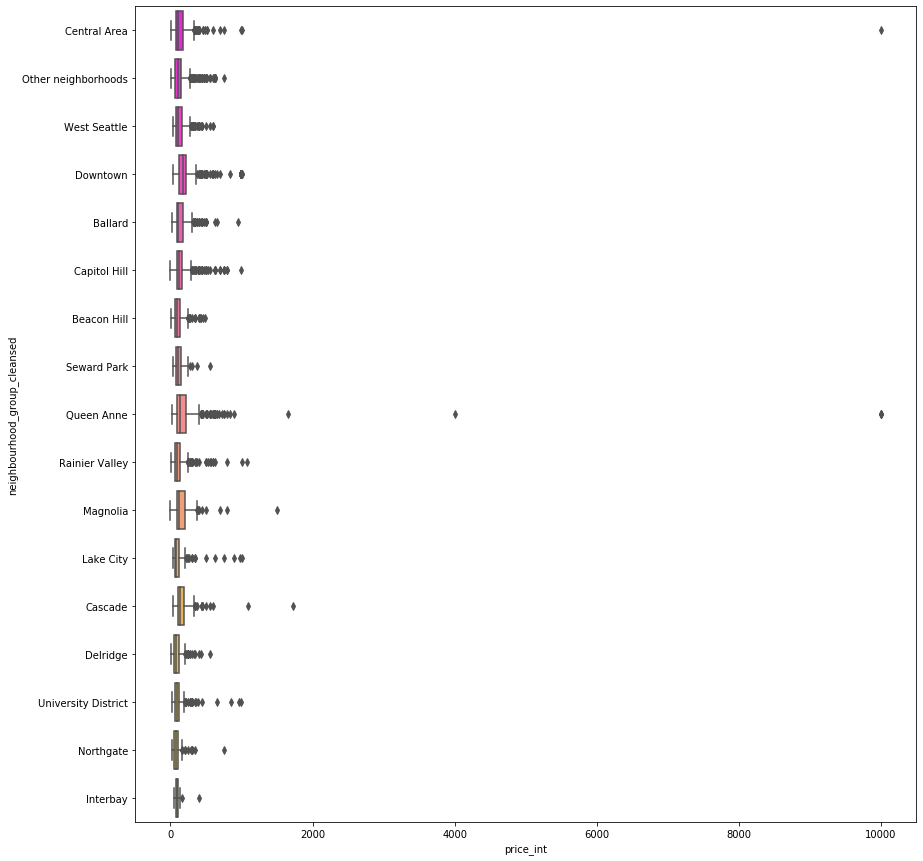

In [27]:
plt.rcParams['figure.figsize'] = [14, 15]

seattle_listings['price_int'] = seattle_listings['price'].map(lambda x: int(x[1:-3].replace(",", "")))

sns.boxplot(x='price_int', y='neighbourhood_group_cleansed', data=seattle_listings, palette='spring');

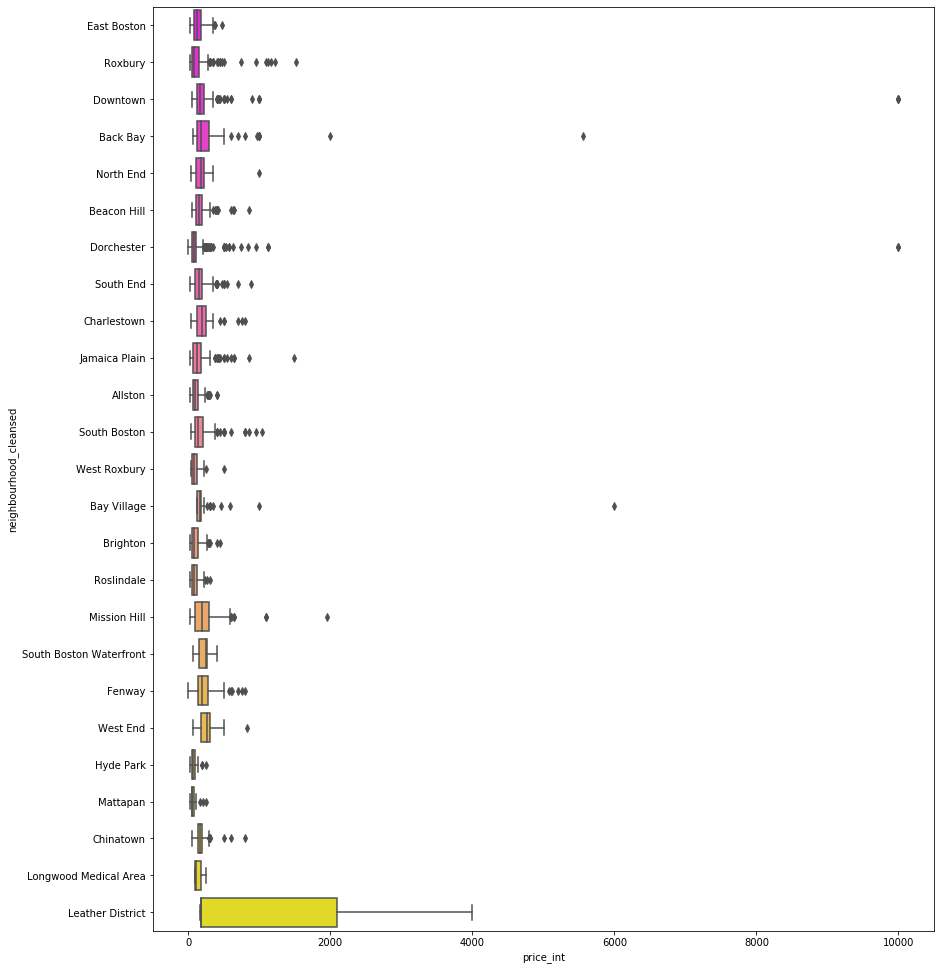

In [28]:
plt.rcParams['figure.figsize'] = [14, 17]

boston_listings['price_int'] = boston_listings['price'].map(lambda x: int(x[1:-3].replace(",", "")))

sns.boxplot(x='price_int', y='neighbourhood_cleansed', data=boston_listings, palette='spring');

**IMPORTANT NOTES TO TAKE:**

1. As we can see, there are some outlier houses that are very expensive when compared to the normals. I will graph the distributions one more time but with a threshold for up to $1,000 for a listing price.

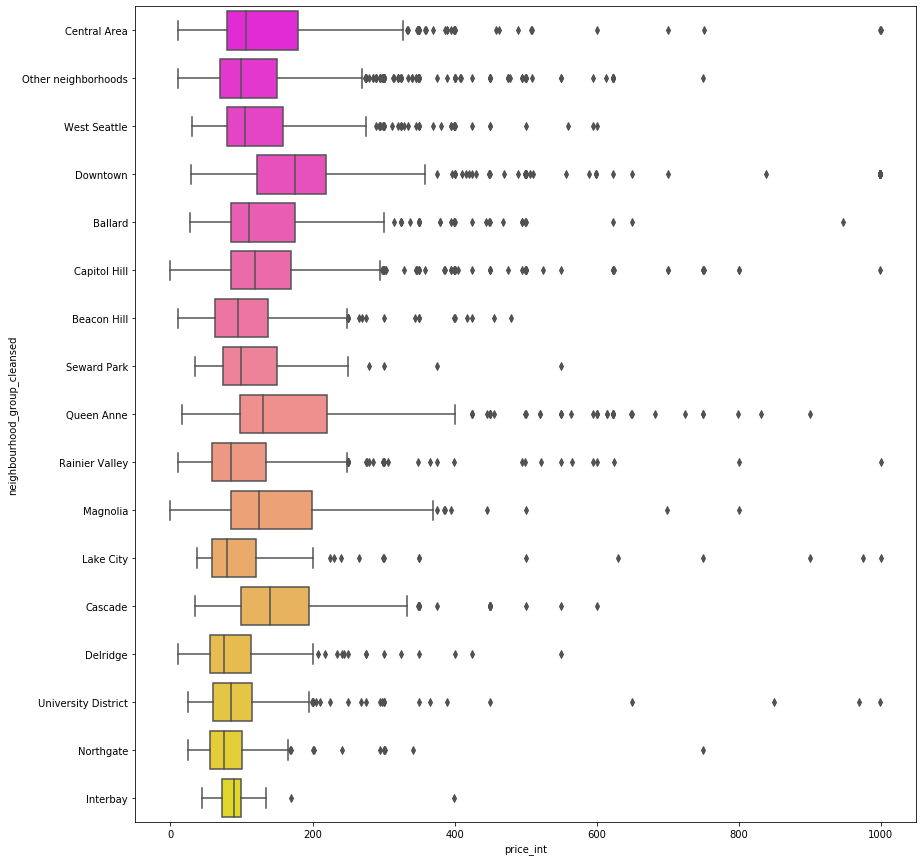

In [31]:
plt.rcParams['figure.figsize'] = [14, 15]

seattle_listings['price_int'] = seattle_listings['price'].map(lambda x: int(x[1:-3].replace(",", "")))

sns.boxplot(x='price_int', y='neighbourhood_group_cleansed',
            data=seattle_listings.loc[seattle_listings['price_int'] <= 1000],
            palette='spring');

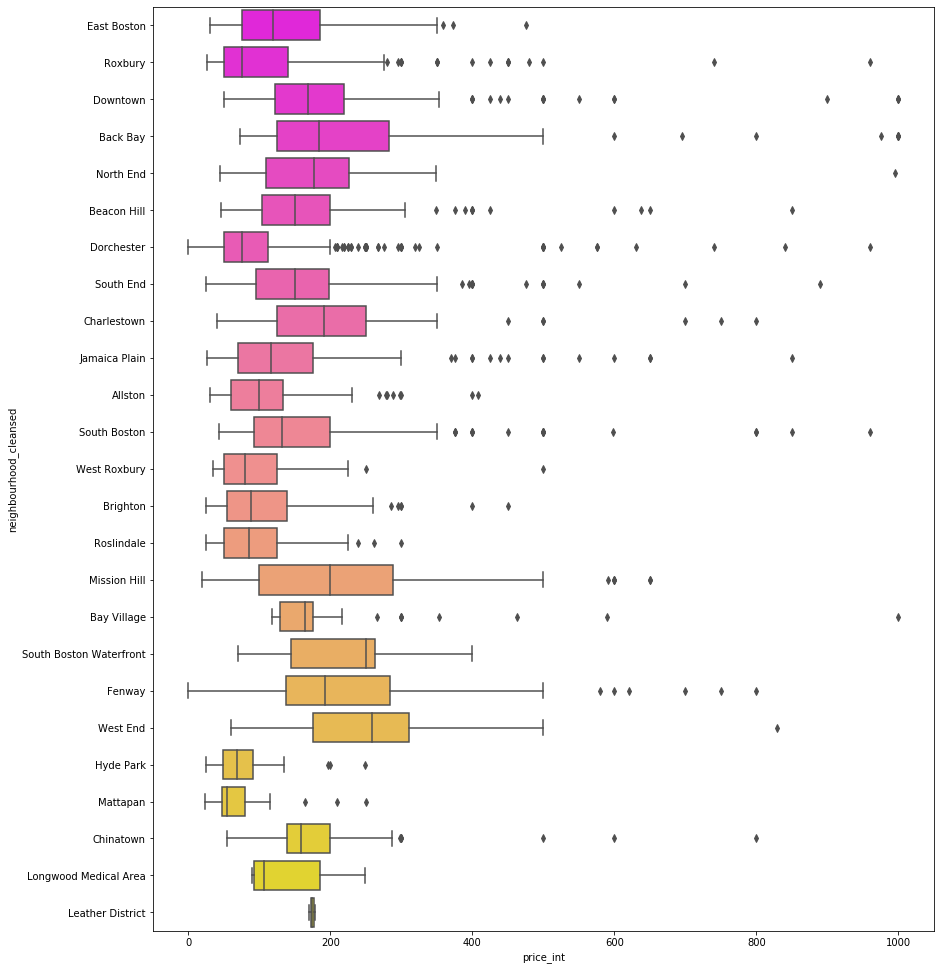

In [33]:
plt.rcParams['figure.figsize'] = [14, 17]

boston_listings['price_int'] = boston_listings['price'].map(lambda x: int(x[1:-3].replace(",", "")))

sns.boxplot(x='price_int', y='neighbourhood_cleansed',
            data=boston_listings.loc[boston_listings['price_int'] <= 1000],
            palette='spring');

**IMPORTANT NOTES TO TAKE:**

1. Our outlier trimming was very simple; however, we could have seen the data distribution much more clearer.
2. The important part to consider when outlier trimming is that Leather District in Boston dataset has expensive listings; so when we trimmed the data, the distribution for that neighbourhood changed, significantly.
3. So, an important note for me: **LOOK AT THE DISTRIBUTION WHEN HANDLING OUTLIERS!!!**

First to understand a listing, I will work on a specific listing Id. If I can grasp the details, I can start to answer these questions, one by one.
I will work on one of the listings from `Seattle` data.

In [34]:
seattle_listings[seattle_listings['id'] == 708774]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_int
139,708774,https://www.airbnb.com/rooms/708774,20200521035945,2020-05-21,Clean and Comfortable Eastlake/Lake Union 1 BR,"Modern, clean one-bedroom apartment in Seattle...","This recently renovated, 500-square-foot unit ...","Modern, clean one-bedroom apartment in Seattle...",none,Located in Seattle's hip Eastlake neighborhood...,Pull-out sofa Wi-Fi Comcast Cable 40-inch Sony...,"Great access to nearby public buses, and easy ...",Guests will have access to the apartment via a...,We aim to respond to guest messages as promptl...,We require our guests to provide us with a dir...,NaN,NaN,https://a0.muscache.com/im/pictures/a0b92879-3...,NaN,316200,https://www.airbnb.com/users/show/316200,William,2010-12-11,"Seattle, Washington, United States","Originally from San Francisco native, I have b...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/316200/profil...,https://a0.muscache.com/im/users/316200/profil...,Eastlake,6,6,"['email', 'phone', 'facebook', 'reviews', 'kba...",t,t,"Seattle, WA, United States",Eastlake,Eastlake,Cascade,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.64,-122.32412,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,$105.00,$610.00,"$2,315.00",$500.00,$100.00,2,$10.00,30,365,30,30,1125,1125,30.0,1125.0,7 months ago,t,0,0,0,0,2020-05-21,129,4,2012-12-13,2019-12-21,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,7,7,0,0,1.42,105


In [35]:
seattle_calendar[seattle_calendar['listing_id'] == 708774].head(30)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,708774,2020-05-21,f,$105.00,$105.00,30,1125
2,708774,2020-05-22,f,$120.00,$120.00,30,1125
3,708774,2020-05-23,f,$120.00,$120.00,30,1125
4,708774,2020-05-24,f,$105.00,$105.00,30,1125
5,708774,2020-05-25,f,$105.00,$105.00,30,1125
6,708774,2020-05-26,f,$105.00,$105.00,30,1125
7,708774,2020-05-27,f,$105.00,$105.00,30,1125
8,708774,2020-05-28,f,$105.00,$105.00,30,1125
9,708774,2020-05-29,f,$120.00,$120.00,30,1125
10,708774,2020-05-30,f,$120.00,$120.00,30,1125


In [36]:
seattle_reviews[seattle_reviews['listing_id'] == 708774]

,listing_id,id,date,reviewer_id,reviewer_name,comments
20018,708774,3082551,2012-12-13,2846307,Richard,"As advertised, a clean very central apartment ..."
20019,708774,3186563,2012-12-30,1486821,Dolly,Apartment was very clean - exactly as pictured...
20020,708774,4010334,2013-04-02,5478592,Nancy,Apartment was just as advertised and worked we...
20021,708774,4885950,2013-05-31,5200030,Julianna & Bob,We had an excellent stay on William's property...
20022,708774,6430083,2013-08-12,7186917,Cindy,Very well appointed and in a great location fo...
...,...,...,...,...,...,...
20142,708774,424432517,2019-03-16,8749783,Danielle,This is my 4th time staying here and I always ...
20143,708774,481960486,2019-07-05,654378,Tom,We enjoyed our stay at Williams appartment. It...
20144,708774,506576937,2019-08-10,121789195,Miriam,There is no parking. Be ready to walk uphill i...
20145,708774,541125015,2019-10-04,265342453,Sebastian,Great place in a great neighborhood. Cozy and ...


**IMPORTANT NOTES TO TAKE:**

1. I think I found a peculiar case for me! Even though in the listings dataset, the listing's price is set as \\$105; when we look at the calendar dataset's price listings, this owner lists his/her property at \\$120 for Friday's and Saturday's.
2. I wonder if every householder does this kind of price incrementation!
3. Also, for data clarity I will not use the price column in listings dataset; but will use mean or median of the listings' price from calendar dataset.
4. If a listing is not available for a specific date, the listing is not shown for that date in the calendar's dataset.
5. Review dataset is self-explanatory, I think.

Let's look another listing from `Boston` dataset!!

In [38]:
boston_listings[boston_listings['id'] == 3781]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_int
0,3781,https://www.airbnb.com/rooms/3781,20200610033559,2020-06-10,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,75%,44%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,4 months ago,t,0,0,7,97,2020-06-10,16,1,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.27,125


In [40]:
boston_calendar[boston_calendar['listing_id'] == 3781].head(30)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2020-06-10,f,$125.00,$125.00,28,1125
1,3781,2020-06-11,f,$125.00,$125.00,28,1125
2,3781,2020-06-12,f,$125.00,$125.00,28,1125
3,3781,2020-06-13,f,$125.00,$125.00,28,1125
4,3781,2020-06-14,f,$125.00,$125.00,28,1125
5,3781,2020-06-15,f,$125.00,$125.00,28,1125
6,3781,2020-06-16,f,$125.00,$125.00,28,1125
7,3781,2020-06-17,f,$125.00,$125.00,28,1125
8,3781,2020-06-18,f,$125.00,$125.00,28,1125
9,3781,2020-06-19,f,$125.00,$125.00,28,1125


In [41]:
boston_reviews[boston_reviews['listing_id'] == 3781]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
5,3781,63371931,2016-02-22,55456499,John-Mark,Frank was very accommodating throughout my sta...
6,3781,67909504,2016-04-01,55456499,John-Mark,Excellent! This was my second stay at the Jeff...
7,3781,97906006,2016-08-28,88528884,Elisa,Frank was a wonderful and accommodating host. ...
8,3781,105143774,2016-09-30,1342806,Nicole,"Frank was great, the apartment has everything ..."
9,3781,129692749,2017-02-01,55126634,Carlos,Very nice. Comfortable apartment. Good locatio...


This householder is much more consistent as you can see. He/she doesn't charge more for people who want to relax a bit on weekends after working very hard :):)